In [96]:
# importing the libraries to read easy data

import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import re

#Reading the Data
df = pd.read_csv('Desktop/Artificial Intellegence/deceptive-opinion.csv')
df.tail(18)

,deceptive,hotel,polarity,source,text
1582,deceptive,palmer,negative,MTurk,Our visit started off on the wrong foot when w...
1583,deceptive,allegro,negative,MTurk,My wife and I were guests at the Hotel Allego ...
1584,deceptive,intercontinental,negative,MTurk,"I only stayed here for five days, but I will d..."
1585,deceptive,amalfi,negative,MTurk,Amalfi Hotel in Chicago is one of the worst ho...
1586,deceptive,palmer,negative,MTurk,The Hilton family would be outraged after hear...
1587,deceptive,palmer,negative,MTurk,Upon entering my hotel room at The Palmer Hous...
1588,deceptive,palmer,negative,MTurk,My stay at The Palmer House Hilton was less th...
1589,deceptive,allegro,negative,MTurk,This hotel was not at all what I expected it w...
1590,deceptive,amalfi,negative,MTurk,My recent stay at the Amalfi Hotel in Chicago ...
1591,deceptive,amalfi,negative,MTurk,My wife and I decided to stay at the Amalfi wh...


In [ ]:
df.shape

In [ ]:
#First let's check with the count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#removing null values from dataframe 
df=df.dropna()

In [ ]:
messages=df.copy()

In [ ]:
#after removing null values there must be some index change we are reseting the indexs to work with for loop
messages.reset_index(inplace=True)

In [ ]:
messages.head(20)

In [ ]:
messages['text'][11]

In [ ]:
#remove stopwords,punctuation, convert it to lowercase
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
nltk_stopwords = set(stopwords.words('english'))
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus[2]

In [ ]:
#lets work on bag of model and apply vectorization

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [ ]:
X.shape

In [ ]:
y = messages['deceptive'] #deceptive #polarity

In [ ]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [ ]:
cv.get_feature_names()[:40]

In [ ]:
cv.get_params()

In [ ]:
count_df = pd.DataFrame(X_train,columns=cv.get_feature_names())

In [ ]:
#lets check the if it's in the same order word
count_df.head()

In [ ]:
def plot_confusion_matrix(cm, classes,normalize=False, title='confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix Without normalization')
        
    thresh = cm.max() / 2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j, i, cm[i,j],horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('predicted label')

# MultinomialNB Algorithm

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [ ]:
from sklearn import metrics
import numpy as np
import itertools

In [ ]:
#training the classifier
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, prediction)
print("accuracy: %0.3f" % score)
cm = metrics.confusion_matrix(y_test,prediction)
plot_confusion_matrix(cm,classes=['FAKE','REAL'])

In [ ]:
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, prediction)
score

In [ ]:
y_train.shape

In [ ]:
#let's check classifier with parameter if it's give better accuracy than non parameter
classifier=MultinomialNB(alpha=0.1)

In [ ]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier = MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train, y_train)
    y_pred = sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
        print("Alpha: {}, Score: {}".format(alpha,score))

In [ ]:
# Get Features names
feature_names = cv.get_feature_names()

In [ ]:
classifier.coef_[0]

In [ ]:
### Most Real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

In [ ]:
## Most Fake
sorted(zip(classifier.coef_[0], feature_names))[:20]

# Passive Aggressive Classifier Algorithm 

In [74]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_classifier=PassiveAggressiveClassifier(max_iter=50)

accuracy: 0.919
Confusion Matrix Without normalization


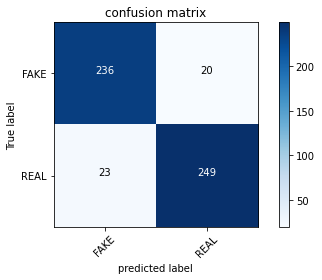

In [75]:
linear_classifier.fit(X_train, y_train)
prediction = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, prediction)
print("accuracy: %0.3f" % score)
calm = metrics.confusion_matrix(y_test,prediction)
plot_confusion_matrix(calm,classes=['FAKE','REAL'])

In [90]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [91]:
y_train

764     positive
735     positive
1141    negative
685     positive
1327    negative
          ...   
96      positive
571     positive
1197    negative
753     positive
1443    negative
Name: polarity, Length: 1200, dtype: object

In [157]:
def main():
    start_time = time()
    val = e2.get()
    vec = cv.transform([val])
    predict = classifier.predict(vec)
    msg = "This is a Positive Real Review"
    if predict[0] == "deceptive":
         msg = "This is a Negative Fake Review"

    Label(main_win,text=msg, font="none 18 bold").grid(row=5,column=0,sticky='NESW')
    
    main_win.mainloop()
    end_time = time()
    print("Time taken : ", end_time - start_time)
    
if __name__ == '__main__':
    #main()    
    main_win = Tk()
    Label (main_win, text="CHECK YOUR REVIEW IS FAKE OR REAL", bg="orange red", fg="white", font="none 24 bold", anchor=CENTER).grid(row=0, column=0, sticky='NESW')

    Label(main_win,text="REVIEW TEXT: ").grid(row=1,column=0,sticky=W,pady=4)
    
    e2 = Entry(main_win)
    e2.grid(row=2, column=0)

    Button(main_win,text='Quit',command=main_win.quit).grid(row=4,column=0,sticky=W,pady=4)
    Button(main_win,text='CHECK',command=main).grid(row=3,column=0,sticky=W,pady=4)
    
    main_win.geometry("460x220")
    main_win.wm_title("FAKE REVIEW DETECTION SYSTEM")

    main_win.mainloop()